In [1]:
from GeoToolkit.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a grid of locations
X, Y = np.meshgrid(np.linspace(-15, 15, 41),np.linspace(-15, 15, 41))
Z = np.ones_like(X) * 5

survey, mesh, model = ProblemSetter.setSyntheticProblem(np.c_[X.flatten(), Y.flatten(), Z.flatten()], EarthField=[50000, 90, 0])

In [5]:
inc, dec = 45, 0

survey = Mag.createMagSurvey(np.c_[X.flatten(), Y.flatten(), Z.flatten()], EarthField=[50000, inc, dec])
prism = Simulator.definePrism()
prob = Mag.Problem(prism=prism, survey=survey)

survey._dobs=prob.fields()[0]

grid = DataIO.dataGrid()

grid._values = survey.dobs.reshape(X.shape)
grid.nx, grid.ny = grid.values.shape[1], grid.values.shape[0]

grid.dx = (X.max() - X.min()) / (grid.values.shape[1] - 1)
grid.dy = (Y.max() - Y.min()) / (grid.values.shape[0] - 1)

grid.x0, grid.y0 = X.min()-grid.dx/2., Y.min()-grid.dy/2.

grid.limits = np.r_[grid.x0, grid.x0+grid.nx*grid.dx, grid.y0, grid.y0+grid.ny*grid.dy]
        
grid.inc, grid.dec = inc, dec

grid.setRTP(True)

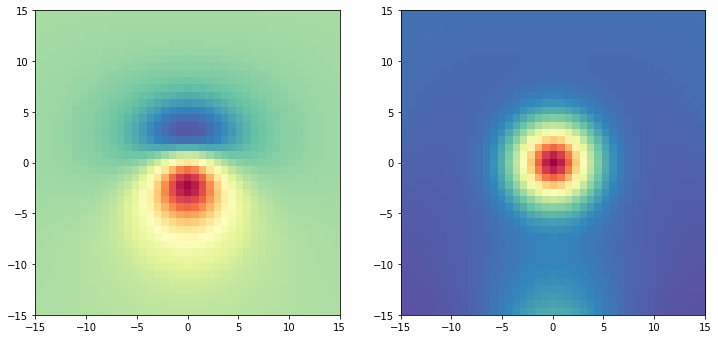

In [6]:
fig = plt.figure(figsize=(12,6))

axs = plt.subplot(1,2,1)
out = Simulator.plotDataHillside(
        grid.hx, grid.hy, survey.dobs.reshape(X.shape), axs=axs, alpha=1, alphaHS=0, equalizeHist=True, cmap="Spectral_r")

axs.set_aspect('equal')

axs = plt.subplot(1,2,2)
out = Simulator.plotDataHillside(
        grid.hx, grid.hy, grid.values, axs=axs, alpha=1, alphaHS=0, equalizeHist=True, cmap="Spectral_r")

axs.set_aspect('equal')
